In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(lubridate))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(reshape2))

Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”


In [2]:
df <- readRDS('../Data/Full_data.rds') %>% mutate(chunk=as.POSIXct(chunk, tz = "GMT", origin="1970-01-01")) %>% select(chunk, texts, abnormal)
df <- df %>% filter(chunk >= '2022-01-01 00:00:00')


In [3]:
RF_preds <- read.csv('../Data/Random_Forest_preds.csv') %>% select(Abnormal_preds)
SVM_preds <- read.csv('../Data/SVM_preds.csv') %>% select(SVM_preds)

In [12]:
sum(SVM_preds$SVM_preds)

[1] 66

In [13]:
df$RF_preds <- RF_preds$Abnormal_preds
df$SVM_preds <- SVM_preds$SVM_preds

In [14]:
sum(SVM_preds$SVM_preds)

[1] 66

In [15]:
df$truth_plot <- ifelse(df$abnormal == 1 & df$SVM_preds==0 & df$RF_preds == 0, df$texts, NA)
df$RF_plot <- ifelse(df$RF_preds == 1 & df$SVM_preds == 0 & df$abnormal ==0, df$texts, NA)
df$SVM_plot <- ifelse(df$RF_preds == 0 & df$SVM_preds == 1 & df$abnormal ==0, df$texts, NA)
df$RF_true_plot <- ifelse(df$RF_preds == 1 & df$SVM_preds == 0 & df$abnormal ==1, df$texts, NA)
df$SVM_true_plot <- ifelse(df$RF_preds == 1 & df$SVM_preds == 0 & df$abnormal ==1, df$texts, NA)
df$RF_SVM_plot <- ifelse(df$RF_preds == 1 & df$SVM_preds == 1 & df$abnormal == 0, df$texts, NA)
df$all_plot <- ifelse(df$RF_preds == 1 & df$SVM_preds == 1 & df$abnormal == 1, df$texts, NA)

In [20]:
str(df)

'data.frame':	3765 obs. of  12 variables:
 $ chunk        : POSIXct, format: "2022-01-01 00:00:00" "2022-01-01 01:00:00" ...
 $ texts        : int  131 157 116 75 66 40 25 28 25 25 ...
 $ abnormal     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ RF_preds     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SVM_preds    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ truth_plot   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ RF_plot      : int  NA NA NA NA NA NA NA NA NA NA ...
 $ RF_true_plot : int  NA NA NA NA NA NA NA NA NA NA ...
 $ SVM_true_plot: int  NA NA NA NA NA NA NA NA NA NA ...
 $ RF_SVM_plot  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ all_plot     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ SVM_plot     : int  NA NA NA NA NA NA NA NA NA NA ...


In [26]:
sum(is.na(df$SVM_plot ))

[1] 3764

In [25]:
sum(df$RF_true_plot)

[1] NA

Warning message:
“Removed 3760 rows containing missing values (geom_point).”
Warning message:
“Removed 3726 rows containing missing values (geom_point).”
Warning message:
“Removed 3744 rows containing missing values (geom_point).”
Warning message:
“Removed 3739 rows containing missing values (geom_point).”
Warning message:
“Removed 3764 rows containing missing values (geom_point).”
Warning message:
“Removed 3763 rows containing missing values (geom_point).”
Warning message:
“Removed 3763 rows containing missing values (geom_point).”
Warning message:
“Removed 3760 rows containing missing values (geom_point).”
Warning message:
“Removed 3726 rows containing missing values (geom_point).”
Warning message:
“Removed 3744 rows containing missing values (geom_point).”
Warning message:
“Removed 3739 rows containing missing values (geom_point).”
Warning message:
“Removed 3764 rows containing missing values (geom_point).”
Warning message:
“Removed 3763 rows containing missing values (geom_point).”

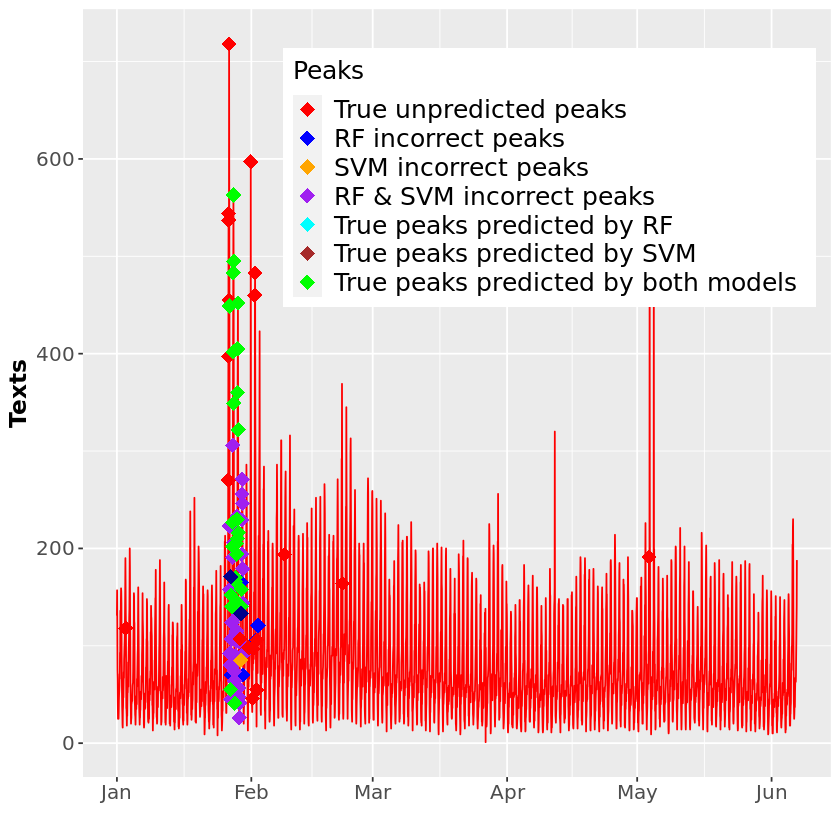

In [36]:
ggplot(df, aes(chunk)) + geom_line(aes(y=texts), colour = 'red') + geom_point(aes(y=RF_plot, alpha = 'RF incorrect peaks'), colour = 'blue', shape = 18, size = 4) +
                         geom_point(aes(y=RF_SVM_plot, alpha = "RF & SVM incorrect peaks"), colour = 'purple', shape = 18, size = 4) +
                geom_point(aes(y=truth_plot, alpha = "True unpredicted peaks"), colour = 'red', shape = 18, size = 4) + geom_point(aes(y=all_plot, alpha="True peaks predicted by both models"), colour = 'green', shape = 18, size = 4) +
                geom_point(aes(y=SVM_plot, alpha = 'SVM incorrect peaks'), colour = 'orange', shape = 18, size = 4) + geom_point(aes(y=SVM_true_plot, alpha = 'True peaks predicted by SVM'), colour = 'brown', shape = 18, size = 4) +
                geom_point(aes(y=RF_true_plot , alpha = 'True peaks predicted by RF'), colour = 'dark blue', shape = 18, size = 4) +
                labs(x= "", y = "Texts", color = "Legend") + scale_alpha_manual(name = "Peaks",
                        values = c(1, 1, 1, 1, 1, 1, 1),
                        breaks = c("True unpredicted peaks", "RF incorrect peaks","SVM incorrect peaks", "RF & SVM incorrect peaks", "True peaks predicted by RF", "True peaks predicted by SVM", "True peaks predicted by both models"),
                        guide = guide_legend(override.aes = list(linetype = c(0, 0, 0, 0, 0, 0, 0), color = c("red", "blue", "orange", "purple", "cyan", "brown", "green")))) + 
                             theme(
                               legend.position = c(.98, .95),
                               legend.justification = c("right", "top"),
                               legend.box.just = "right",
                                legend.margin = margin(6, 6, 6, 6),
                            legend.title = element_text(size=15),
                            legend.text = element_text(size=15),
                            axis.text=element_text(size=12),
                            axis.title=element_text(size=14,face="bold")
                           )

ggsave('../Plots/Classification_predictions.pdf', height = 10, width = 20)

In [30]:
df_zoom <- df %>% filter(chunk >= "2022-01-23 00:00:00" & chunk <= "2022-02-07 00:00:00")

Warning message:
“Removed 356 rows containing missing values (geom_point).”
Warning message:
“Removed 322 rows containing missing values (geom_point).”
Warning message:
“Removed 346 rows containing missing values (geom_point).”
Warning message:
“Removed 335 rows containing missing values (geom_point).”
Warning message:
“Removed 360 rows containing missing values (geom_point).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”
Warning message:
“Removed 356 rows containing missing values (geom_point).”
Warning message:
“Removed 322 rows containing missing values (geom_point).”
Warning message:
“Removed 346 rows containing missing values (geom_point).”
Warning message:
“Removed 335 rows containing missing values (geom_point).”
Warning message:
“Removed 360 rows containing missing values (geom_point).”
Warning message:
“Removed 359 rows containing missing values (geom_point).”
Warning mess

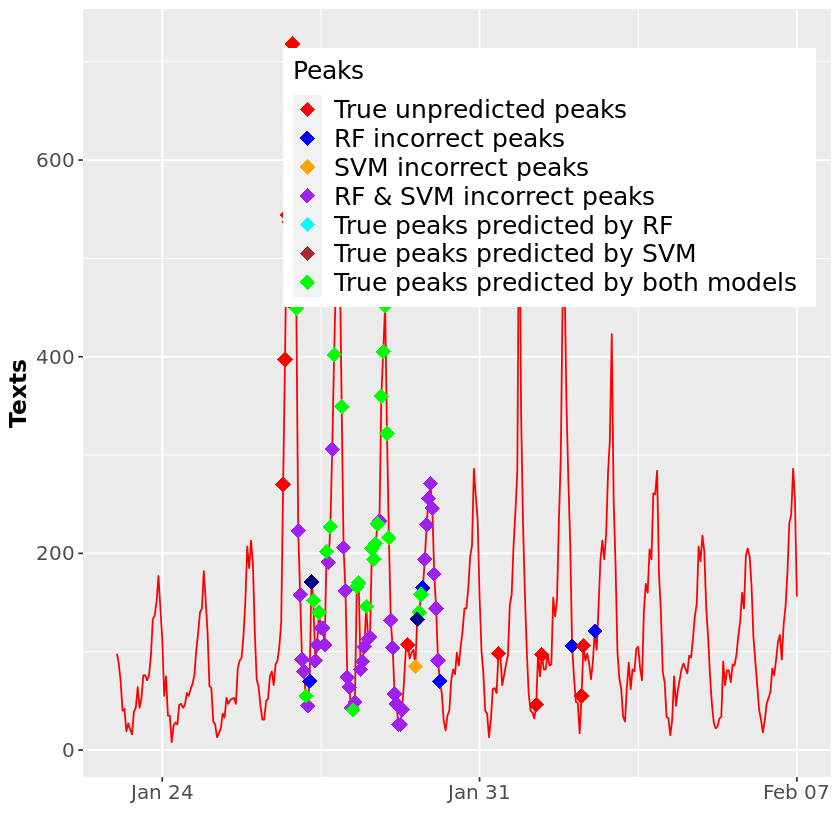

In [37]:
ggplot(df_zoom, aes(chunk)) + geom_line(aes(y=texts), colour = 'red') + geom_point(aes(y=RF_plot, alpha = 'RF incorrect peaks'), colour = 'blue', shape = 18, size = 4) +
                         geom_point(aes(y=RF_SVM_plot, alpha = "RF & SVM incorrect peaks"), colour = 'purple', shape = 18, size = 4) +
                geom_point(aes(y=truth_plot, alpha = "True unpredicted peaks"), colour = 'red', shape = 18, size = 4) + geom_point(aes(y=all_plot, alpha="True peaks predicted by both models"), colour = 'green', shape = 18, size = 4) +
                geom_point(aes(y=SVM_plot, alpha = 'SVM incorrect peaks'), colour = 'orange', shape = 18, size = 4) + geom_point(aes(y=SVM_true_plot, alpha = 'True peaks predicted by SVM'), colour = 'brown', shape = 18, size = 4) +
                geom_point(aes(y=RF_true_plot , alpha = 'True peaks predicted by RF'), colour = 'dark blue', shape = 18, size = 4) +
                labs(x= "", y = "Texts", color = "Legend") + scale_alpha_manual(name = "Peaks",
                        values = c(1, 1, 1, 1, 1, 1, 1),
                        breaks = c("True unpredicted peaks", "RF incorrect peaks","SVM incorrect peaks", "RF & SVM incorrect peaks", "True peaks predicted by RF", "True peaks predicted by SVM", "True peaks predicted by both models"),
                        guide = guide_legend(override.aes = list(linetype = c(0, 0, 0, 0, 0, 0, 0), color = c("red", "blue", "orange", "purple", "cyan", "brown", "green")))) + 
                             theme(
                               legend.position = c(.98, .95),
                               legend.justification = c("right", "top"),
                               legend.box.just = "right",
                                legend.margin = margin(6, 6, 6, 6),
                            legend.title = element_text(size=15),
                            legend.text = element_text(size=15),
                            axis.text=element_text(size=12),
                            axis.title=element_text(size=14,face="bold")
                           )


ggsave('../Plots/Classification_predictions_zoomed.pdf', height = 10, width = 20)

In [38]:
df_zoom

chunk,texts,abnormal,RF_preds,SVM_preds,RF_plot,SVM_plot,truth_plot,RF_SVM_plot,all_plot
<dttm>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>,<int>
